### Import Libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
data = pd.read_csv('ai_assistant_usage_student_life.csv')

In [3]:
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [8]:
data.tail()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3
9999,SESSION10000,Undergraduate,Math,2025-04-16,10.85,3,Writing,4,Assignment Completed,True,4.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [7]:
data.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [9]:
data.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

### Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = ['StudentLevel', 'Discipline' , 'TaskType', 'FinalOutcome']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [12]:
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,2,2,2024-11-03,31.20,11,4,2,0,True,1.0
1,SESSION00002,2,6,2024-08-25,13.09,6,4,3,0,True,2.0
2,SESSION00003,2,1,2025-01-12,19.22,5,1,3,0,True,3.3
3,SESSION00004,2,2,2025-05-06,3.70,1,1,3,0,True,3.5
4,SESSION00005,2,6,2025-03-18,28.12,9,5,3,0,True,2.9


In [13]:
data['UsedAgain'] = data['UsedAgain'].astype(int)

In [14]:
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,2,2,2024-11-03,31.20,11,4,2,0,1,1.0
1,SESSION00002,2,6,2024-08-25,13.09,6,4,3,0,1,2.0
2,SESSION00003,2,1,2025-01-12,19.22,5,1,3,0,1,3.3
3,SESSION00004,2,2,2025-05-06,3.70,1,1,3,0,1,3.5
4,SESSION00005,2,6,2025-03-18,28.12,9,5,3,0,1,2.9


### Split Data

In [16]:
x = data.drop(['SessionID', 'SessionDate', 'UsedAgain'], axis = 1)
y = data['UsedAgain']

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.3 , random_state= 42)

In [19]:
x_train.max()

StudentLevel            2.00
Discipline              6.00
SessionLengthMin      110.81
TotalPrompts           39.00
TaskType                5.00
AI_AssistanceLevel      5.00
FinalOutcome            3.00
SatisfactionRating      5.00
dtype: float64

In [20]:
x_test.max()

StudentLevel           2.00
Discipline             6.00
SessionLengthMin      92.76
TotalPrompts          34.00
TaskType               5.00
AI_AssistanceLevel     5.00
FinalOutcome           3.00
SatisfactionRating     5.00
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Build Model

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train_scaled ,y_train)
y_pred = model.predict(x_test_scaled)

### Evaluation

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test ,y_pred)
class_re =classification_report(y_test, y_pred)

c:\Users\Ramo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ramo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [29]:
print('accuracy : ' , accuracy)
print('classification_report : ', class_re)

accuracy :  0.703
classification_report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00       891
           1       0.70      1.00      0.83      2109

    accuracy                           0.70      3000
   macro avg       0.35      0.50      0.41      3000
weighted avg       0.49      0.70      0.58      3000



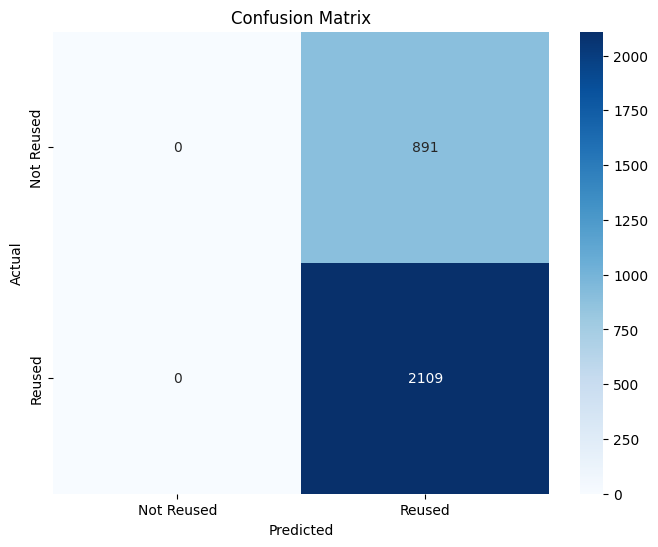

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Reused', 'Reused'],
            yticklabels=['Not Reused', 'Reused'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance based on Logistic Regression Coefficients:")
print(feature_importance)


Feature Importance based on Logistic Regression Coefficients:
              Feature  Coefficient
3        TotalPrompts     0.059091
0        StudentLevel     0.005638
7  SatisfactionRating    -0.002951
5  AI_AssistanceLevel    -0.013022
4            TaskType    -0.026461
2    SessionLengthMin    -0.027841
1          Discipline    -0.027967
6        FinalOutcome    -0.099544


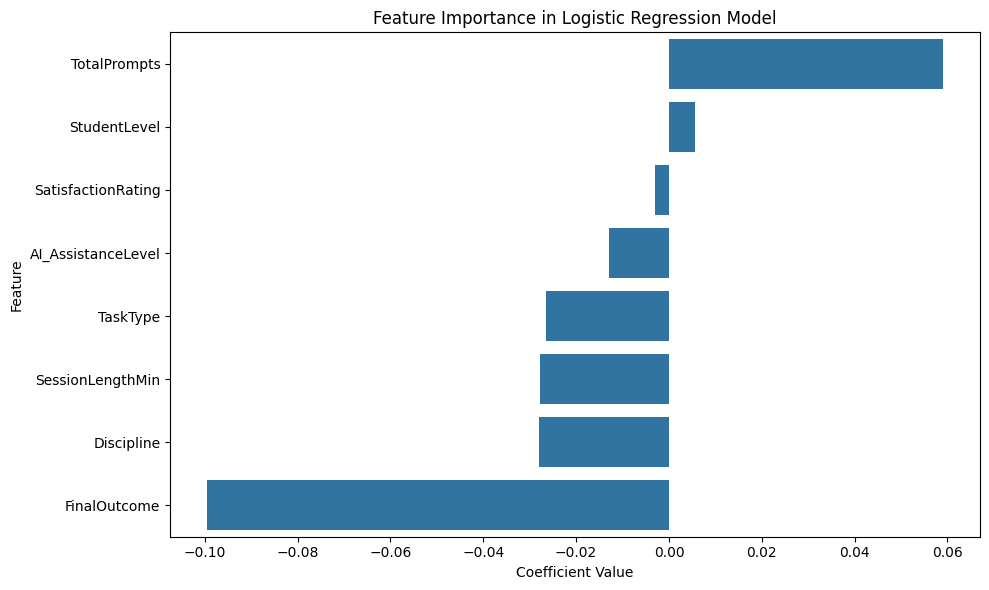

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [36]:
sample_data = x_test_scaled[0:1]
sample_pred = model.predict(sample_data)
sample_prob = model.predict_proba(sample_data)

print("\nSample Prediction:")
print("Predicted Value:", "Reused" if sample_pred[0] == 1 else "Not Reused")
print(f"Probability of Not Reused: {sample_prob[0][0]:.2f}")
print(f"Probability of Reused: {sample_prob[0][1]:.2f}")



Sample Prediction:
Predicted Value: Reused
Probability of Not Reused: 0.29
Probability of Reused: 0.71
